# smile_metric()

Note that "column number" is with respect to the image from the perspective of the camera.

See method `cross_track_stats()`

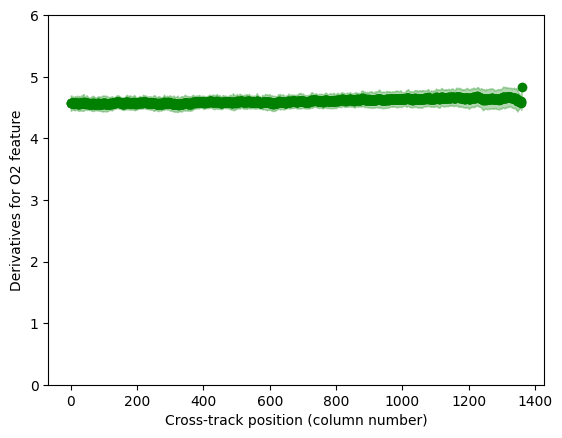

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import hyperquest

# Example usage
hdr_path = '/Users/brent/Code/HyperQuest/tests/data/SISTER_EMIT_L1B_RDN_20220827T091626_000.hdr'

# running smile_metric()
o2_mean, co2_mean, o2_std, co2_std = hyperquest.smile_metric(hdr_path)

# column numbers can be made using the length of the result here
column_numbers = range(0, len(o2_mean))

# plotting
plt.scatter(column_numbers, o2_mean, color='green')
plt.fill_between(column_numbers, o2_mean - o2_std, o2_mean + o2_std, color='green', alpha=0.3)
plt.ylabel('Derivatives for O2 feature')
plt.xlabel('Cross-track position (column number)')
plt.ylim(0,6)
plt.show()

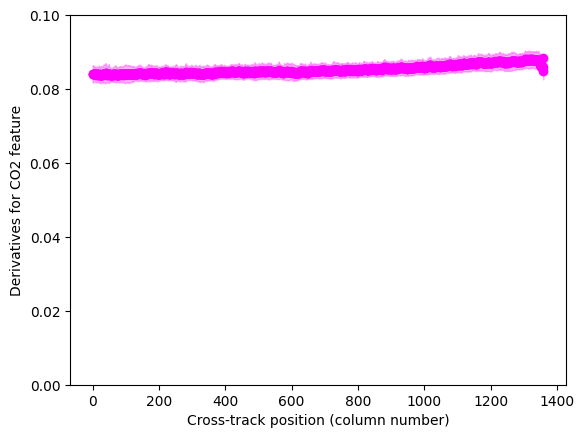

In [10]:
# plotting co2 now
plt.scatter(column_numbers, co2_mean, color='magenta')
plt.fill_between(column_numbers, co2_mean - co2_std, co2_mean + co2_std, color='magenta', alpha=0.3)
plt.ylabel('Derivatives for CO2 feature')
plt.xlabel('Cross-track position (column number)')
plt.ylim(0, 0.1)
plt.show()

# nodd_o2a()

for reference here are the params I used for running radiative transfer:
```python
run_libradtran(22.8, # h2o in mm   estimate from MODIS
               0.122, # AOT@550   estimate from MODIS
               9.274039, # mean VZA from OBS file (EMIT L1B)
               11.815027, # mean VAA from OBS file (EMIT L1B)
               hdr_path, 
               ncpus=2,
               libradtran_path=my_lrt_path)

In [4]:
path_to_rtm_output_csv = "../tests/data/rtm-SISTER_EMIT_L1B_RDN_20220827T091626_000/radiative_transfer_output.csv"

cwl, fwhm, sensor_band, sensor_fwhm = hyperquest.nodd_o2a(hdr_path, 
                                                          path_to_rtm_output_csv, 
                                                          rho_s=0.15, # can be assumed , exact reflectance is not needed in NODD
                                                          ncpus=8,
                                                          mask_waterbodies=True, 
                                                          no_data_value=-9999)

# outputs
# CWL: array of optimal CWL at sensor_band
# FWHM: array of optimal FWHM at sensor band
# sensor_band: value given in hdr for CWL closest to O2-A.
# sensor_fwhm: value given in hdr for FWHM closest to O2-A.


/opt/homebrew/lib/python3.11/site-packages/hyperquest/optimization.py:19: RuntimeWarning: invalid value encountered in divide
  l_toa_model = np.trapz(rtm_radiance * srf, dx=1) / np.trapz(srf, dx=1)
/opt/homebrew/lib/python3.11/site-packages/hyperquest/optimization.py:19: RuntimeWarning: invalid value encountered in divide
  l_toa_model = np.trapz(rtm_radiance * srf, dx=1) / np.trapz(srf, dx=1)
/opt/homebrew/lib/python3.11/site-packages/hyperquest/optimization.py:19: RuntimeWarning: invalid value encountered in divide
  l_toa_model = np.trapz(rtm_radiance * srf, dx=1) / np.trapz(srf, dx=1)
/opt/homebrew/lib/python3.11/site-packages/hyperquest/optimization.py:19: RuntimeWarning: invalid value encountered in divide
  l_toa_model = np.trapz(rtm_radiance * srf, dx=1) / np.trapz(srf, dx=1)


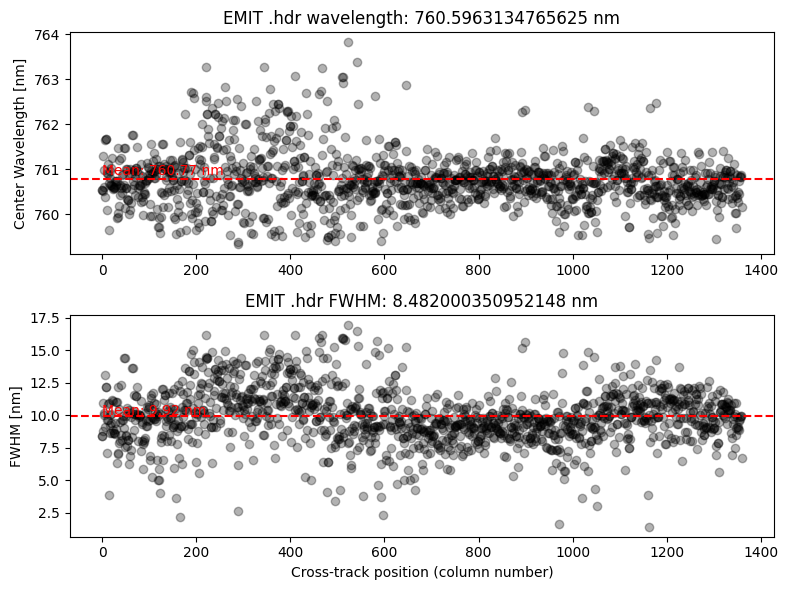

In [5]:
# means
mean_cwl = np.nanmean(cwl)
mean_fwhm = np.nanmean(fwhm)

# plot code
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].scatter(column_numbers, cwl, color='k', alpha=0.3)
ax[0].axhline(mean_cwl, color='r', linestyle='--')
ax[0].text(0, mean_cwl+0.1, f'Mean: {mean_cwl:.2f} nm', color='r') 
ax[0].set_title(f'EMIT .hdr wavelength: {sensor_band} nm')
ax[0].set_xlabel('')
ax[0].set_ylabel('Center Wavelength [nm]')

ax[1].scatter(column_numbers, fwhm, color='k', alpha=0.3)
ax[1].axhline(mean_fwhm, color='r', linestyle='--')
ax[1].text(0, mean_fwhm+0.1, f'Mean: {mean_fwhm:.2f} nm', color='r') 
ax[1].set_title(f'EMIT .hdr FWHM: {sensor_fwhm} nm')
ax[1].set_xlabel('Cross-track position (column number)')
ax[1].set_ylabel('FWHM [nm]')

plt.tight_layout()
plt.show()